In [1]:
!pip install opendatasets pandas numpy scikit-learn xgboost --quiet

In [2]:
import opendatasets as od
dataset_url="https://www.kaggle.com/c/new-york-city-taxi-fare-prediction"

In [3]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mandavasathvik
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:13<00:00, 124MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [4]:
!ls

new-york-city-taxi-fare-prediction  sample_data


In [5]:
data_dir='new-york-city-taxi-fare-prediction'

In [6]:
#shows the data
!ls -lh {data_dir} 

total 5.4G
-rw-r--r-- 1 root root  486 Jun 22 09:07 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Jun 22 09:07 sample_submission.csv
-rw-r--r-- 1 root root 960K Jun 22 09:07 test.csv
-rw-r--r-- 1 root root 5.4G Jun 22 09:08 train.csv


In [7]:
#number of lines
!wc -l {data_dir}/train.csv 

55423856 new-york-city-taxi-fare-prediction/train.csv


In [8]:

!wc -l {data_dir}/test.csv 

9914 new-york-city-taxi-fare-prediction/test.csv


In [9]:
#looking at first few line of the data

!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [10]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

 as data is large we are going to pick up smaller once and come back to the bigger once for implementation


In [11]:
import pandas as pd

In [12]:
selected_cols='fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [13]:
dtypes={
    'fare_amount':'float32',
    
    'pickup_longitude':'float32',
    'pickup_latitude':'float32',
    'dropoff_longitude':'float32',
    'dropoff_latitude':'float32',
    'passenger_count':'uint8',
}

In [14]:
import random

In [15]:
random.random()

0.49169931548457624

In [16]:
sample_fraction=0.01
def skip_row(row_idx):
  if row_idx==0:
    return False
  return random.random()>sample_fraction
#random.seed is used to make sure you are getting the same random values every time you rerun the notebook
random.seed(42)

df=pd.read_csv(data_dir+'/train.csv',
               usecols=selected_cols,
               parse_dates=['pickup_datetime'],
               dtype=dtypes,
               skiprows=skip_row)

In [17]:
pd

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

In [18]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


In [19]:
test_df=pd.read_csv(data_dir+'/test.csv',dtype=dtypes,parse_dates=['pickup_datetime'])

Evaluate the errors and data require for cleaning

In [20]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255057,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [22]:
df['pickup_datetime'].min(),df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Going through test data

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [24]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [25]:
test_df['pickup_datetime'].min(),df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

We will take only 80% of the data to tests on unseen data

In [26]:
from sklearn.model_selection import train_test_split

don't forget to add random state for very big datasets especially when you are using random seed


In [27]:
train_df,val_df=train_test_split(df,test_size=0.2,random_state=42)

In [28]:
len(train_df),len(val_df)

(441960, 110490)

check whether your sample has missing value, it is okay to drop if it's less than 1%

In [29]:
train_df=train_df.dropna()
val_df=val_df.dropna()

In [30]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

Dividing the data for input and output

In [31]:
input_cols=[ 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [32]:
target_col='fare_amount'

Training

In [33]:
train_inputs=train_df[input_cols]

In [34]:
train_targets=train_df[target_col]

In [35]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [36]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [37]:
val_inputs=val_df[input_cols]

In [38]:
val_targets=val_df[target_col]

In [39]:
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

In [40]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977386,40.738335,-73.976143,40.751205,1
515867,-73.983910,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750019,3
19482,-73.986725,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980057,40.760334,-73.872589,40.774300,1


In [41]:
test_inputs=test_df[input_cols]

Here we are making a basic model that always predicts the average

In [42]:
import numpy as np

In [43]:
class MeanRegressor:
  def fit(self,inputs,targets):
    self.mean=targets.mean()

  def predict(self,inputs):
    return  np.full(inputs.shape[0],self.mean)

In [44]:
mean_model=MeanRegressor()

In [45]:
mean_model.fit(train_inputs,train_targets)

In [46]:
mean_model.mean

11.354714

In [47]:
train_preds=mean_model.predict(train_inputs)

In [48]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [49]:
val_preds=mean_model.predict(val_inputs)

In [50]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
def rmse(targets,preds):
  return mean_squared_error(targets,preds,squared=False)

In [53]:
train_rmse=rmse(train_targets,train_preds)
train_rmse

9.789782

In [54]:
val_rmse=rmse(val_targets,val_preds)
val_rmse

9.899954

Training and evaluating Baseline model to check with linear regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linear_model=LinearRegression()

In [57]:
linear_model.fit(train_inputs,train_targets)

LinearRegression()

In [58]:
train_preds=linear_model.predict(train_inputs)

In [59]:
train_preds

array([11.546237, 11.28461 , 11.28414 , ..., 11.458918, 11.284281,
       11.284448], dtype=float32)

In [60]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [61]:
rmse(train_targets,train_preds)

9.788632

In [62]:
val_preds=linear_model.predict(val_inputs)

In [63]:
val_preds

array([11.284328 , 11.284496 , 11.2847805, ..., 11.8045   , 11.284433 ,
       11.284133 ], dtype=float32)

In [64]:
val_targets


15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

In [65]:
rmse(val_targets,val_preds)

9.898088

Linear regression here is completely useless because the lang and lons were also included in the data

#Make predictions and Code for submitting to kaggle competition


In [66]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [67]:
test_preds = linear_model.predict(test_inputs)

In [68]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')


In [69]:
sub_df


,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [70]:
sub_df['fare_amount']=test_preds

In [71]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284280
1,2015-01-27 13:08:24.0000003,11.284634
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284222
4,2012-12-01 21:12:12.0000003,11.284050
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720225
9911,2015-04-19 20:44:15.0000001,11.721249
9912,2015-01-31 01:05:19.0000005,11.720798


In [72]:
sub_df.to_csv('linear_model_submission.csv',index=None)

Function to generate and submit for competitions

In [73]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [74]:
#generate_submission(test_preds, 'linreg_submission.csv')

###Feauture Engineering

What is feature engineering: Creating new columns and see whether they help

Extract parts of Date





In [75]:

def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [76]:
add_dateparts(train_df, 'pickup_datetime')

In [77]:
add_dateparts(val_df, 'pickup_datetime')


In [78]:
add_dateparts(test_df, 'pickup_datetime')

In [79]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18


**Distance b/w pickup and drop location**

In [80]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [81]:
def add_trip_distance(df):
  df['trip_distance']=haversine_np(df['pickup_longitude'],
                                   df['pickup_latitude'],
                                   df['dropoff_longitude'],
                                   df['dropoff_latitude'])

In [82]:
add_trip_distance(train_df)

In [83]:
add_trip_distance(val_df)

In [84]:
add_trip_distance(test_df)

In [85]:
train_df


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101


**Calculating distance from popular landmarks to generate more accurate results** 

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Museum
- World Trade Center

In [86]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126


In [87]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [88]:
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

In [89]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
4950,27.870001,2010-08-11 16:02:00+00:00,-73.864288,40.770855,-73.984673,40.750992,1,2010,8,11,2,16,10.370248,21.248405,9.749453,17.387085,3.637211,4.766121
173377,4.500000,2010-11-06 13:59:42+00:00,-73.979004,40.758518,-73.973785,40.764400,4,2010,11,6,5,13,0.787390,21.421843,8.511603,18.841354,1.889686,6.510244
52489,10.000000,2013-07-09 18:03:01+00:00,-73.955032,40.772209,-73.968369,40.755104,1,2013,7,9,1,18,2.207437,20.418131,8.303317,18.829184,2.734536,5.877184
82085,8.900000,2010-09-08 10:56:00+00:00,-73.967690,40.768578,-73.960106,40.780449,5,2010,9,8,2,10,1.465589,21.774673,7.255995,20.689610,0.285760,8.626845
15208,57.330002,2014-04-29 12:56:36+00:00,-73.781227,40.644951,-73.982658,40.764198,1,2014,4,29,1,12,21.530001,21.988331,9.252487,18.163809,2.352280,6.175792


##Removing outliers and invalid data

In [90]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [91]:
train_df = remove_outliers(train_df)

In [92]:
val_df = remove_outliers(val_df)


#Train and evaluate models

We'll train each of the following and check

- Ridge Regression
- Random Forests
- Gradient Boosting

Exercise: Train Ridge, svm, knn, Decision Tree models

In [93]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [94]:
input_cols=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [95]:
target_col='fare_amount'

In [96]:
train_inputs=train_df[input_cols]
train_targets=train_df[target_col]


In [97]:
val_inputs=val_df[input_cols]
val_targets=val_df[target_col]

In [98]:
test_inputs = test_df[input_cols]

In [99]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

##Ridge Regression

In [100]:
from sklearn.linear_model import Ridge

In [101]:
model1=Ridge(random_state=42,alpha=0.9)

In [102]:

model1.fit(train_inputs,train_targets)

Ridge(alpha=0.9, random_state=42)

In [103]:
evaluate(model1)

(5.049314043918831,
 5.217845618599148,
 array([ 8.12923647,  4.11617242,  8.75016006, ..., 10.47209139,
         8.2307147 , 10.5869553 ]),
 array([10.91913868,  6.20507267, 46.2188478 , ...,  8.04612766,
        25.56777317,  8.45283364]))

In [104]:
train_inputs.shape

(431098, 16)

###Random Forest

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [107]:
model2.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [108]:
evaluate(model2)


(3.6022913838561528,
 4.167257655248953,
 array([ 7.06907907,  9.09651906,  9.09834234, ..., 10.39574834,
         7.73362485, 10.36404777]),
 array([12.53923917,  6.14414213, 47.3274893 , ...,  8.32839336,
        29.20883778,  8.27729971]))

##Gradient Boosting

In [109]:
from xgboost import XGBRegressor

In [110]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [111]:
model3.fit(train_inputs, train_targets)

XGBRegressor(n_jobs=-1, objective='reg:squarederror', random_state=42)

In [112]:
evaluate(model3)

(3.879053,
 4.2217526,
 array([ 6.6994143,  9.161248 ,  9.574939 , ..., 10.394749 ,  8.265368 ,
        10.1085   ], dtype=float32),
 array([12.318071 ,  6.3984184, 47.9326   , ...,  8.086578 , 29.583286 ,
         8.507793 ], dtype=float32))

#Training hyperparameters

In [113]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [114]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

**NO of Trees**

CPU times: user 12min 3s, sys: 1.39 s, total: 12min 4s
Wall time: 6min 24s


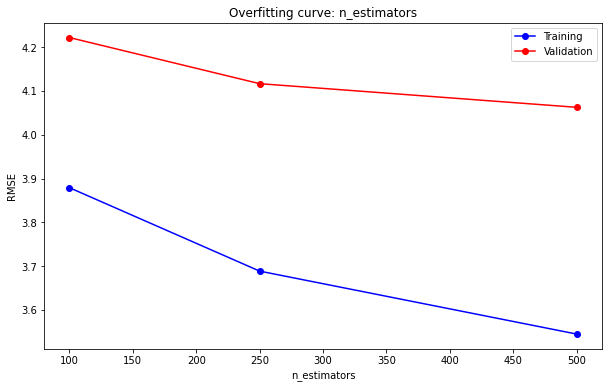

In [115]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

In [116]:
best_params['n_estimators'] = 250

## Max Depth

CPU times: user 13min 52s, sys: 1.57 s, total: 13min 53s
Wall time: 7min 13s


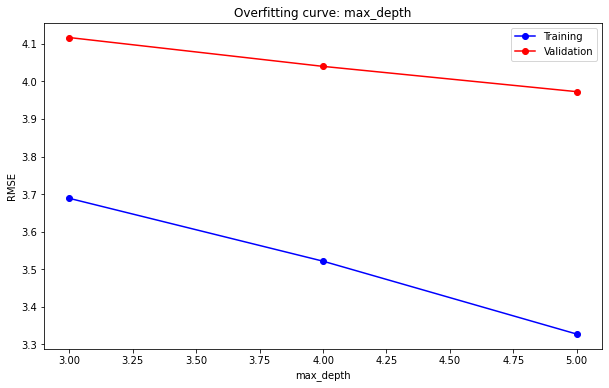

In [117]:
%%time 
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

In [118]:
best_params['max_depth'] = 5

#Learning Rate

CPU times: user 17min 57s, sys: 1.72 s, total: 17min 59s
Wall time: 9min 25s


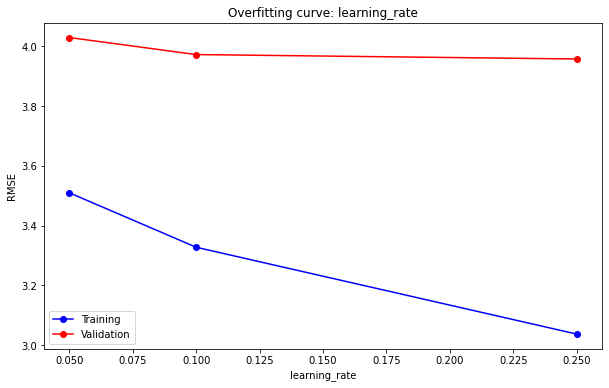

In [119]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [120]:
best_params['learning_rate'] = 0.25

#Other Parameters

In [121]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [122]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 9min 35s, sys: 1.15 s, total: 9min 36s
Wall time: 4min 59s


XGBRegressor(colsample_bytree=0.8, max_depth=5, n_estimators=500, n_jobs=-1,
             objective='reg:squarederror', random_state=42, subsample=0.8)

In [123]:
evaluate(xgb_model_final)

(3.151729,
 3.9472775,
 array([ 6.409039 ,  7.37552  ,  9.897856 , ..., 11.418503 ,  8.842723 ,
        10.4735365], dtype=float32),
 array([13.954995 ,  6.1164503, 47.80559  , ...,  7.686546 , 29.838123 ,
         8.789446 ], dtype=float32))